In [21]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

## Open RGB composites for both dates.

In [22]:
#pre-fire data
# Create the path to your data
landsat_pre_fire_path = os.path.join("data","pre-woolsey-fire")
                                      
# Generate a list of tif files
pre_fire_paths = glob(os.path.join(landsat_pre_fire_path,
                                        "*Raw*.tiff"))

# Sort the data to ensure bands are in the correct order
pre_fire_paths.sort()
pre_fire_paths

['data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B12_(Raw).tiff',
 'data/pre

In [23]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [24]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(pre_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

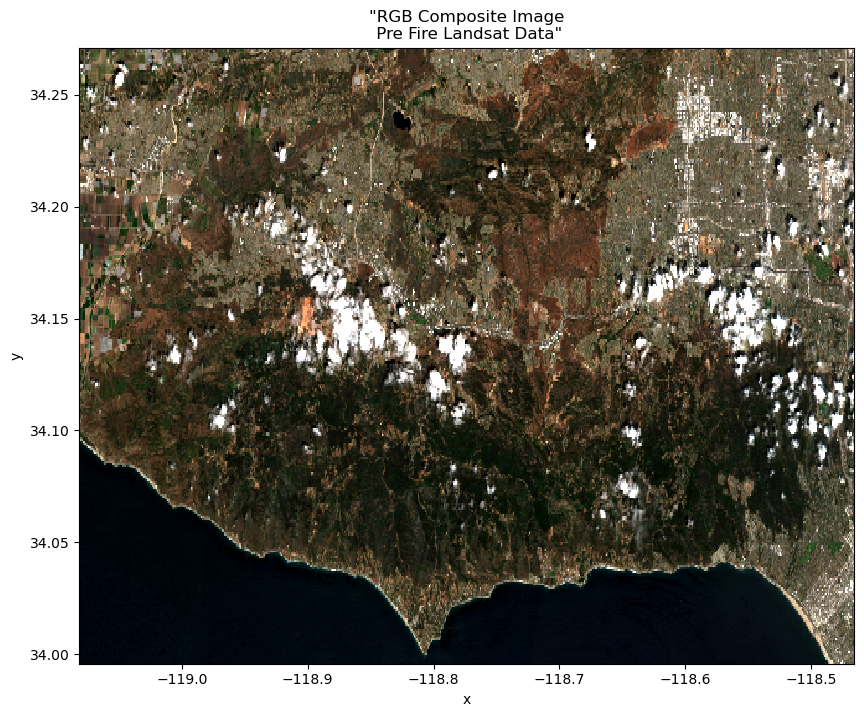

In [25]:
landsat_pre_fire_xr = xr.concat(all_bands, dim="band") #Turn list of bands into a single xarray object 

landsat_pre_fire_rgb = (landsat_pre_fire_xr[[3,2,1],:,:])
landsat_pre_fire_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Pre Fire Landsat Data"')
plt.show()

In [26]:
#post-fire data
# Get list of all pre-cropped data and sort the data

# Create the path to your data
landsat_post_fire_path = os.path.join("data","post-woolsey-fire")
                                      
# Generate a list of tif files
post_fire_paths = glob(os.path.join(landsat_post_fire_path,
                                        "*Raw*.tiff"))

# Sort the data to ensure bands are in the correct order
post_fire_paths.sort()
post_fire_paths

['data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B12_(Raw).tiff',

In [27]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

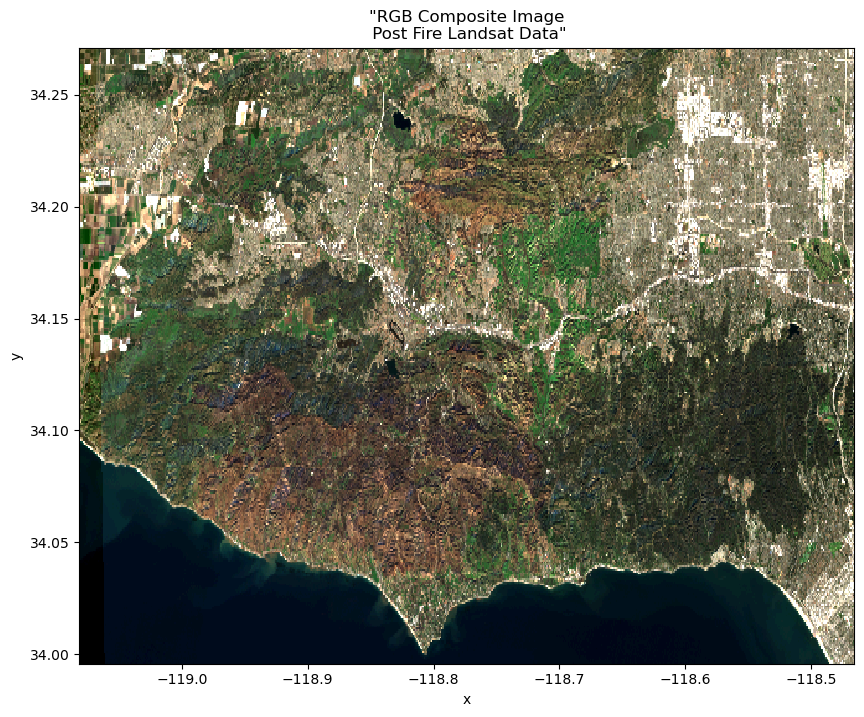

In [28]:
landsat_post_fire_xr = xr.concat(all_bands, dim="band") #Turn list of bands into a single xarray object 

landsat_post_fire_rgb = (landsat_post_fire_xr[[3,2,1],:,:])
landsat_post_fire_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Post Fire Landsat Data"')
plt.show()

## Map RGB for both dates

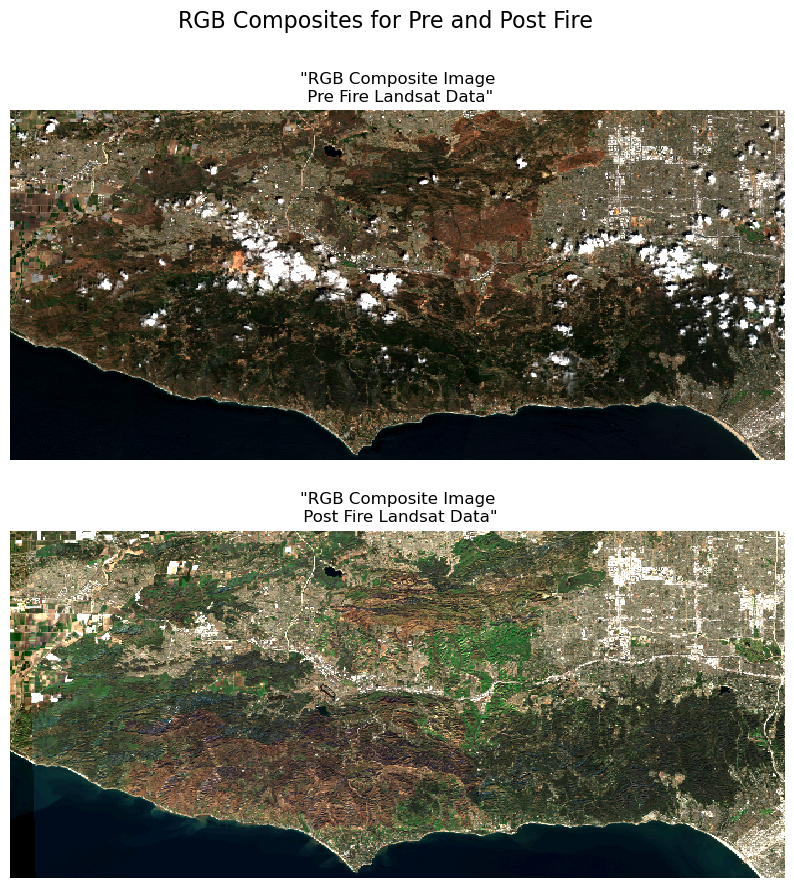

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

landsat_pre_fire_rgb.plot.imshow(rgb="band",
                        robust = True, 
                        ax=ax1)
ax1.set_title('"RGB Composite Image\n Pre Fire Landsat Data"')

landsat_post_fire_rgb.plot.imshow(rgb="band",
                        robust = True, 
                        ax=ax2)
ax2.set_title('"RGB Composite Image\n Post Fire Landsat Data"')

plt.suptitle('RGB Composites for Pre and Post Fire', fontsize=16)
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

## Calculate the NDVI for both dates

In [30]:
red_band = rxr.open_rasterio(pre_fire_paths[0], masked=True).squeeze()
nir_band = rxr.open_rasterio(pre_fire_paths[7], masked=True).squeeze()

In [31]:
ndvi_pre_fire = (nir_band - red_band) / (nir_band + red_band)

In [32]:
red_band = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
nir_band = rxr.open_rasterio(post_fire_paths[7], masked=True).squeeze()

In [33]:
ndvi_post_fire = (nir_band - red_band) / (nir_band + red_band)

## Map NDVI for both dates

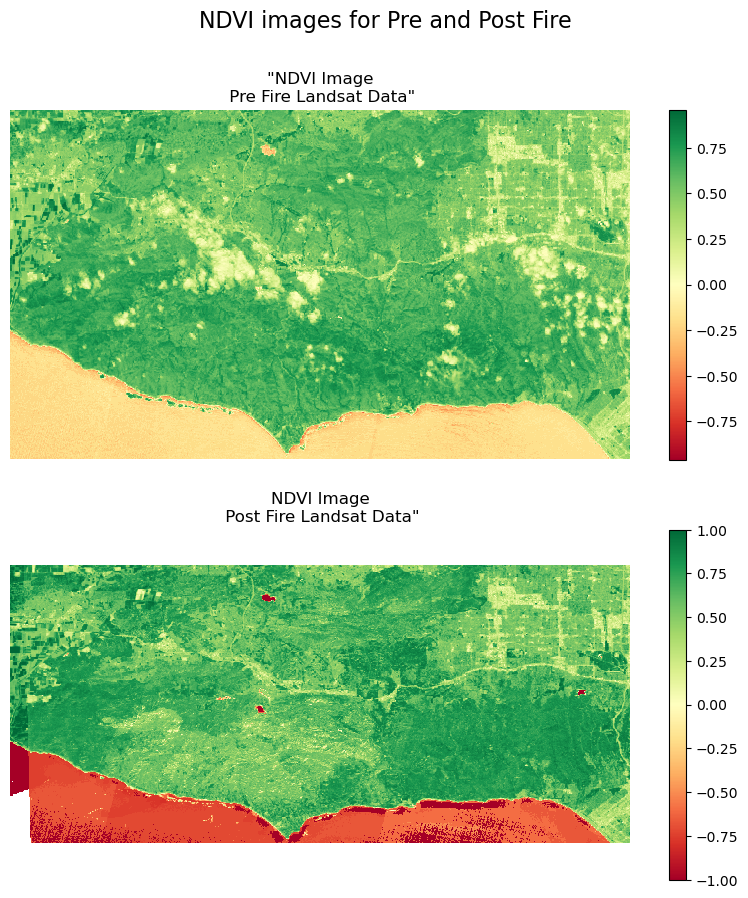

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ndvi_pre_fire.plot.imshow(cmap="RdYlGn",
                            ax=ax1)
ax1.set_title('"NDVI Image\n Pre Fire Landsat Data"')

ndvi_post_fire.plot.imshow(cmap="RdYlGn",
                            ax=ax2)
ax2.set_title('NDVI Image\n Post Fire Landsat Data"')

plt.suptitle('NDVI images for Pre and Post Fire', fontsize=16)
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

## The differences seen between the RGB/NDVI maps.

Upon examining RGB images before and after a fire, it is clear that there has been significant damage to the forests, as large expanses of greenery have been transformed into brown due to the fire.
We can confirm the destruction of forests by analyzing NDVI images before and after a fire, as the areas that were previously rich in vegetation had higher NDVI values and post fire, they have now been reduced to lower values. This provides additional evidence to support the observation that large green areas have turned brown due to the fire.